UC3MAL201 Machine Learning Session 4 Activity sheet 4 Leon Eriksen Helgeland -
First written 27.08.2020

# Classification - KNN

## Objective
The aim of this activity sheet is to load a customer dataset, fit the data, and use KNN to
predict a data point.

## 1. Dataset descrip#on
A telecommunication company has categorised its customers into four groups
depending upon their service usage. The prime business interest is to customise the
product offers for its valuable customers. This is a classification problem where using
the historical dataset a classifier is supposed to be designed, which can be used to
predict the class of an unknown case. The target field is ‘custcat’. You are required to
use the KNN classification for this very dataset.

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [84]:
dataset_file_name = 'teleCust1000t.csv'
dataset_directory = 'dataset'

In [85]:
df = pd.read_csv(f'{dataset_directory}/{dataset_file_name}')

In [86]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## 2. Basic data processing
### 1. See how many instances of each class is in the given dataset using visualisation techniques.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


### 2. Convert Pandas DataFrame to NumPy array

In [88]:
counter = 0
for column in df.columns:
    print(f'{counter}: {column}')
    counter+=1

0: region
1: tenure
2: age
3: marital
4: address
5: income
6: ed
7: employ
8: retire
9: gender
10: reside
11: custcat


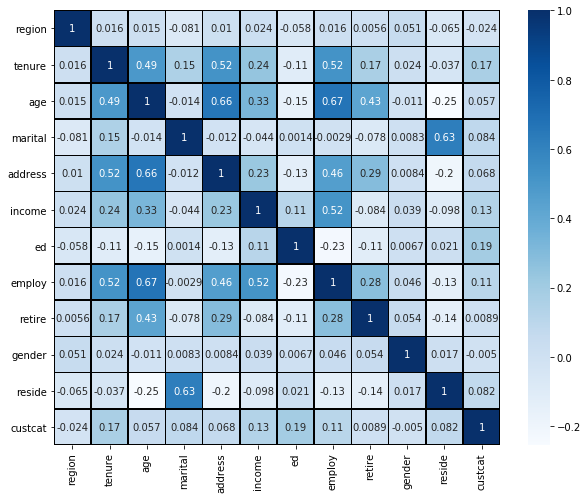

In [89]:
# 1 - Correlation of original dataframe
correlation = df.corr()
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, linecolor='black', linewidth=0.5, annot=True, cmap='Blues')

In [90]:
df = df.to_numpy()

### 3. Define the attribute set and the target value ‘custcat’

In [91]:
y = df[:,11] # The 'custcat' (customer category) columns has index 11 in the numpy array
X = df[:,[1,5,6,7]]

### 4. Perform z-score standardisation for feature scaling using preprocessing.StandardScaler() from sklearn

In [95]:
data = X
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(data)
print(scaled_data)
X = scaled_data

[[-1.055125   -0.12650641  1.0877526  -0.5941226 ]
 [-1.14880563  0.54644972  1.9062271  -0.5941226 ]
 [ 1.52109247  0.35951747 -1.36767088  1.78752803]
 ...
 [ 1.47425216  8.09851297  1.9062271   2.18446981]
 [ 1.61477311  0.08846569 -0.54919639  1.09287993]
 [ 0.67796676 -0.36017173  0.26927811 -0.79259348]]
[[-1.055125   -0.12650641  1.0877526  -0.5941226 ]
 [-1.14880563  0.54644972  1.9062271  -0.5941226 ]
 [ 1.52109247  0.35951747 -1.36767088  1.78752803]
 ...
 [ 1.47425216  8.09851297  1.9062271   2.18446981]
 [ 1.61477311  0.08846569 -0.54919639  1.09287993]
 [ 0.67796676 -0.36017173  0.26927811 -0.79259348]]


### 5. Using scikit-learn perform training and test data split (80% - 20%)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Kick start KNN
### 1. Develop a classifier with K = 3 using KNeighborsClassifier() from sklearn.neighbors

In [98]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [102]:
neigh.predict(X_test)[0:5]

array([4., 1., 1., 3., 1.])

### 2. Check the accuracy of your classifier on the test dataset, using metrics.accuracy_score() from sklearn.

In [103]:
neigh.score(X_test, y_test)

0.65

### 4. Which is the opimal value of K?
Develop a loop wherein you can evaluate the accuracy of your KNN classifier starting
from K = 1 until K = 10. You are required to calculate the model accuracy at every
step as before.

In [108]:
k_list = []
for i in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X, y)
    accuracy = neigh.score(X_test, y_test)
    k_list.append(accuracy)
    print(f'K = {i} : {accuracy}')



K = 1 : 1.0
K = 2 : 0.66
K = 3 : 0.65
K = 4 : 0.555
K = 5 : 0.55
K = 6 : 0.535
K = 7 : 0.535
K = 8 : 0.525
K = 9 : 0.465
K = 10 : 0.46


### 5. Visualisaton of model accuracy
Plot the model accuracy for the different values of K. Purpose of this task is to
visualise the comparison among the various neighbours, as performed in the above
task.

Text(0.5, 0, 'KNN Number of neighbors')

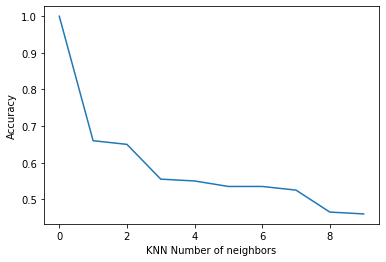

In [114]:
plt.plot(k_list)
plt.ylabel('Accuracy')
plt.xlabel('KNN Number of neighbors')